In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from keras.optimizers import Adam
from keras.callbacks import Callback

from keras.utils import np_utils
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

from keras import backend as K
K.set_image_data_format('channels_last')



In [2]:
import matplotlib as mlp
mlp.style.use('classic')

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [4]:
mean = np.mean(X_train, axis = (0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))
X_train = (X_train - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
Classes = 10
Y_train = np_utils.to_categorical(Y_train, Classes)
Y_test = np_utils.to_categorical(Y_test, Classes)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

In [8]:
print(X_train.shape)
print(X_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
Y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Convolutional Neural Network:**

**Model Creation:**

In [10]:
input_shape = (32, 32, 3)

In [11]:
def Model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = input_shape))
  model.add(Conv2D(32, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.4))

  model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(512, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(Classes, activation = 'softmax'))
  

  return model

In [12]:
K.clear_session()
model = Model()

In [13]:
#Optimizer:
AdamOptimizer = Adam(learning_rate  = 0.001)
model.compile(optimizer = AdamOptimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [15]:
class CustomCallBack(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (epoch %5 == 0):
      print('Just finished epoch: ', epoch)
      print('----------------------------------')
      print('Loss on the validation dataset = ', logs.get('val_loss'))
      print('Accuracy reached train is', logs.get('accuracy'))
      print('Accuracy reached val  is', logs.get('val_accuracy'))
      return      

**Training:**

In [16]:
batch_size = 256
epochs = 50

CC = CustomCallBack()
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
                    verbose = 0,
                    validation_data = (X_val, Y_val),
                    callbacks = [CC])
  

Just finished epoch:  0
----------------------------------
Loss on the validation dataset =  1.6650513410568237
Accuracy reached train is 0.2586750090122223
Accuracy reached val  is 0.36500000953674316
Just finished epoch:  5
----------------------------------
Loss on the validation dataset =  0.9619793891906738
Accuracy reached train is 0.6112250089645386
Accuracy reached val  is 0.6518999934196472
Just finished epoch:  10
----------------------------------
Loss on the validation dataset =  0.8429039120674133
Accuracy reached train is 0.690850019454956
Accuracy reached val  is 0.7032999992370605
Just finished epoch:  15
----------------------------------
Loss on the validation dataset =  0.7434350848197937
Accuracy reached train is 0.7307999730110168
Accuracy reached val  is 0.7387999892234802
Just finished epoch:  20
----------------------------------
Loss on the validation dataset =  0.7029545307159424
Accuracy reached train is 0.7530999779701233
Accuracy reached val  is 0.754899978

Text(0.5, 1.0, 'Loss Curves')

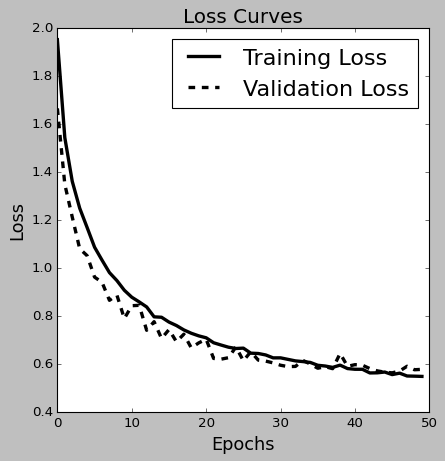

In [17]:
#Training and Validation Loss Plots:
plt.figure(figsize = [6,6])
plt.plot(history.history['loss'], 'black', linewidth = 3)
plt.plot(history.history['val_loss'], 'black',ls = '--',  linewidth = 3)
plt.legend(['Training Loss', 'Validation Loss'], fontsize = 20)
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Loss Curves', fontsize = 18)

**Testing:**

In [18]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)


313/313 - 1s - loss: 0.5911 - accuracy: 0.8026 - 855ms/epoch - 3ms/step


In [19]:
A = model.predict(X_test[10:20])
predictions = np.argmax(A, axis = 1)
print("Actual Label of Image", Y_test[10:20])
print("Predicted Label of Image", predictions)

1/1 [==============================] - 0s 177ms/step
Actual Label of Image [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Predicted Label of Image [8 9 4 7 9 6 5 7 8 6]
